# SUOX: Sulfite Oxidase Deficiency

[Sulfite oxidase deficiency (ISOD)](https://omim.org/entry/272300) is caused by homozygous or compound heterozygous mutation in the sulfite oxidase gene (SUOX).

Data from [Li JT, et al. Mutation analysis of SUOX in isolated sulfite oxidase deficiency with ectopia lentis as the presenting feature: insights into genotype-phenotype correlation](https://pubmed.ncbi.nlm.nih.gov/36303223/)

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using genophenocorr version 0.9.6.dev0


### SUOX
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SUOX.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'SUOX'
mane_tx_id = 'NM_001032386.2' 
mane_protein_id = 'NP_001027558.1' # sulfite oxidase, mitochondrial
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.24") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize()

Individuals Processed: 100%|██████████| 35/35 [00:00<00:00, 155.93 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

viewer = CohortViewer(hpo)
viewer.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
28,Seizure
18,Sulfocysteinuria
15,Hypotonia
11,Hypertonia
11,Abnormality of extrapyramidal motor function
10,Microcephaly
10,Hypohomocysteinemia
9,Hypocystinemia
8,Global developmental delay
7,Hypouricemia


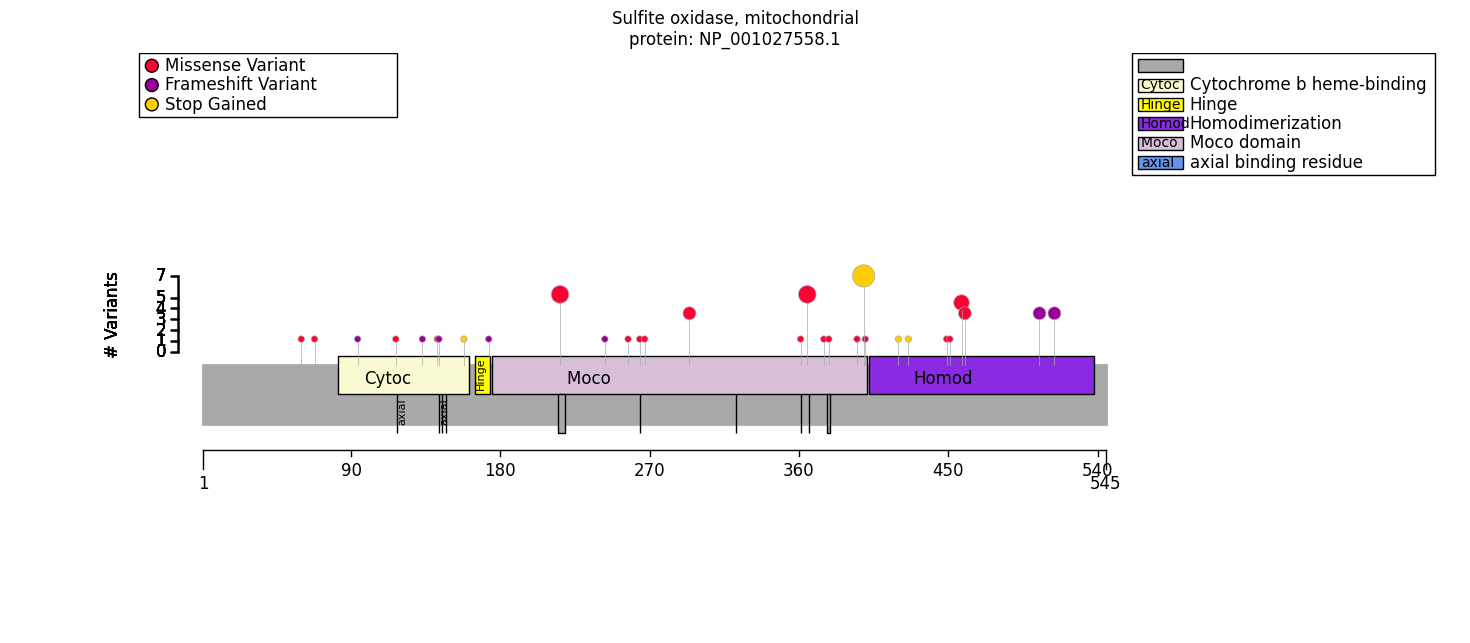

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

suox_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
suox_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_meta, mane_tx_id)
viewer.process(cohort)

Count,Name,Type,Coordinates,Variants
6,Cytochrome b5 heme-binding,Domain,83 - 161,p.Gln145SerfsTer16; p.Glu97Ter; p.Glu134ProfsTer26; p.Glu159Ter; p.His143Asn; p.His118Tyr
0,axial binding residue,Binding site,119 - 118,
0,axial binding residue,Binding site,144 - 143,
0,,Binding site,146 - 145,
0,,Binding site,148 - 147,
1,Hinge,Region,166 - 174,p.Asp174ThrfsTer13
26,Moco domain,Region,176 - 401,p.Gly295Glu; p.Ile258Leu; p.Arg217Gln; p.Arg366Cys; p.Gly362Ser; p.Lys401Glu; p.Leu245ProfsTer27; p.Arg366His; p.Arg268Gln; p.Tyr400Ter; p.Ala265Asp; p.Lys379Arg; p.Gln396Arg; p.Arg217Gly; p.Arg376Cys
4,,Binding site,216 - 219,p.Arg217Gln; p.Arg217Gly
0,,Binding site,265 - 264,
0,,Binding site,323 - 322,


In [7]:
from gpsea.view import CohortVariantViewer
cvv = CohortVariantViewer(tx_id=mane_tx_id)
cvv.process(cohort=cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
7,12_56004589_56004589_C_G,c.1200C>G (p.Tyr400Ter),5,stop gained
3,12_56004485_56004485_C_T,c.1096C>T (p.Arg366Cys),5,missense
3,12_56004765_56004765_G_A,c.1376G>A (p.Arg459Gln),5,missense
3,12_56004039_56004039_G_A,c.650G>A (p.Arg217Gln),5,missense
2,12_56004273_56004273_G_A,c.884G>A (p.Gly295Glu),5,missense
2,12_56004905_56004909_ATTGT_A,c.1521_1524del (p.Cys508ArgfsTer109),5,frameshift
2,12_56004933_56004933_A_ACAATGTGCAGCCAGACACCGTGGCCC,c.1549_1574dup (p.Ile525MetfsTer102),5,frameshift
2,12_56004771_56004771_A_T,c.1382A>T (p.Asp461Val),5,missense
1,12_56004192_56004192_G_A,c.803G>A (p.Arg268Gln),5,missense
1,12_56004576_56004576_A_G,c.1187A>G (p.Gln396Arg),5,missense


# Genotype-Phenotype Correlation (GPC) Analysis

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.analysis.predicate import variant_effect
from gpsea.analysis.clf import biallelic_classifier
from gpsea.model import VariantEffect
from gpsea.view import MtcStatsViewer

missense = variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)

missense_clf = biallelic_classifier(
    a_predicate=missense,
    b_predicate=~missense,
    a_label="Missense",
    b_label="Other",
    partitions=((0,1), (2,))
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(missense_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,4
"Skipping ""general"" level terms",25
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),32


In [10]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group,Missense/Missense OR Missense/Other,Other/Other,Corrected p values,p values
Seizure [HP:0001250],17/24 (71%),11/11 (100%),0.645850,0.072129
Hypouricemia [HP:0003537],3/11 (27%),4/5 (80%),0.645850,0.105769
Developmental regression [HP:0002376],6/17 (35%),0/8 (0%),0.645850,0.129170
Hypotonia [HP:0001252],12/16 (75%),3/7 (43%),0.682109,0.181896
Abnormality of extrapyramidal motor function [HP:0002071],9/17 (53%),2/8 (25%),0.701053,0.233684
Global developmental delay [HP:0001263],4/17 (24%),4/8 (50%),0.898040,0.359216
Microcephaly [HP:0000252],6/14 (43%),4/7 (57%),1.000000,0.659443
Hypertonia [HP:0001276],7/16 (44%),4/7 (57%),1.000000,0.666846
Neurodevelopmental abnormality [HP:0012759],10/10 (100%),4/4 (100%),1.000000,1.000000
Abnormal circulating sulfur amino acid concentration [HP:0004339],10/10 (100%),5/5 (100%),1.000000,1.000000


In [11]:
from gpsea.analysis.predicate import protein_feature

moco = protein_feature(feature_id="Moco domain", protein_metadata=protein_meta)
moco_predicate = biallelic_classifier(
    a_predicate=moco,
    b_predicate=~moco,
    a_label="Moco domain",
    b_label="Other",
    partitions=((0,1), (2,))
)

moco_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=moco_predicate,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=moco_result)

Allele group,Moco domain/Moco domain OR Moco domain/Other,Other/Other,Corrected p values,p values
Global developmental delay [HP:0001263],3/16 (19%),5/9 (56%),1.0,0.086998
Seizure [HP:0001250],21/24 (88%),7/11 (64%),1.0,0.171455
Hypouricemia [HP:0003537],4/12 (33%),3/4 (75%),1.0,0.261538
Hypotonia [HP:0001252],8/14 (57%),7/9 (78%),1.0,0.399785
Hypertonia [HP:0001276],8/14 (57%),3/9 (33%),1.0,0.400323
Microcephaly [HP:0000252],7/13 (54%),3/8 (38%),1.0,0.659443
Abnormality of extrapyramidal motor function [HP:0002071],8/16 (50%),3/9 (33%),1.0,0.676619
Abnormal muscle tone [HP:0003808],11/11 (100%),8/8 (100%),1.0,1.000000
Developmental regression [HP:0002376],4/16 (25%),2/9 (22%),1.0,1.000000
Ectopia lentis [HP:0001083],5/12 (42%),2/6 (33%),1.0,1.000000


In [12]:

homodimerization = protein_feature(feature_id="Homodimerization", protein_metadata=protein_meta)
homodimerization_clf = biallelic_classifier(
    a_predicate=homodimerization,
    b_predicate=~homodimerization,
    a_label="homodimerization",
    b_label="Other",
    partitions=((0,1), (2,))
)

homodimerization_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=homodimerization_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=homodimerization_result)

Allele group,homodimerization/homodimerization OR homodimerization/Other,Other/Other,Corrected p values,p values
Microcephaly [HP:0000252],0/9 (0%),10/12 (83%),0.003317,0.000221
Developmental regression [HP:0002376],5/11 (45%),1/14 (7%),0.420652,0.056087
Hypertonia [HP:0001276],3/10 (30%),8/13 (62%),0.876316,0.213757
Global developmental delay [HP:0001263],2/11 (18%),6/14 (43%),0.876316,0.233684
Ectopia lentis [HP:0001083],1/6 (17%),6/12 (50%),0.931415,0.315611
Seizure [HP:0001250],9/13 (69%),19/22 (86%),0.931415,0.383429
Abnormality of extrapyramidal motor function [HP:0002071],6/11 (55%),5/14 (36%),0.931415,0.434660
Hypouricemia [HP:0003537],3/9 (33%),4/7 (57%),1.000000,0.614510
Hypotonia [HP:0001252],6/10 (60%),9/13 (69%),1.000000,0.685018
Sulfocysteinuria [HP:0032350],5/5 (100%),13/13 (100%),1.000000,1.000000


In [13]:
from gpsea.analysis.temporal.endpoint import disease_onset
suox = "OMIM:272300" # Sulfite oxidase deficiency	

endpoint = disease_onset(disease_id=suox)
from gpsea.analysis.temporal.stats import LogRankTest
survival_statistic = LogRankTest()
from gpsea.analysis.temporal import SurvivalAnalysis
survival_analysis = SurvivalAnalysis(
    statistic=survival_statistic,
)
missense_onset_result = survival_analysis.compare_genotype_vs_survival(
    cohort=cohort,
    gt_clf=missense_clf,
    endpoint=endpoint,
)
print(f"survival analysis p={missense_onset_result.pval:.5f}")

survival analysis p=0.00001


Text(1000, 0.6, '$p=0.00001$')

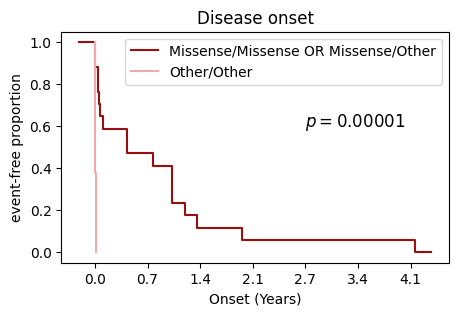

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from gpsea.model import Age

missense_onset_fig, ax = plt.subplots(figsize=(5, 3))
missense_onset_result.plot_kaplan_meier_curves(ax=ax)
def days_to_years(x, pos):
    return f"{x / Age.DAYS_IN_YEAR:.1f}"


ax.xaxis.set_major_formatter(FuncFormatter(days_to_years))
ax.set_xlabel("Onset (Years)")
ax.set_ylabel("event-free proportion")
ax.set_title("Disease onset")
s = f"p={missense_onset_result.pval:.5f}"
ax.text(x=1000, y=0.6, s=f"${s}$", fontsize=12)

In [15]:
homodimerization_onset_result = survival_analysis.compare_genotype_vs_survival(
    cohort=cohort,
    gt_clf=homodimerization_clf,
    endpoint=endpoint,
)
print(f"survival analysis p={homodimerization_onset_result.pval:.5e}");

survival analysis p=8.53274e-01


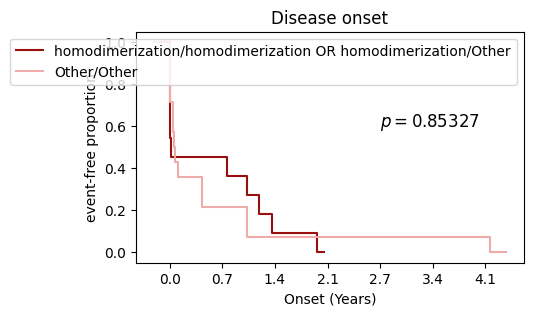

In [16]:
hd_onset_fig, ax = plt.subplots(figsize=(5, 3))
homodimerization_onset_result.plot_kaplan_meier_curves(ax=ax)
def days_to_years(x, pos):
    return f"{x /Age.DAYS_IN_YEAR:.1f}"


ax.xaxis.set_major_formatter(FuncFormatter(days_to_years))
ax.set_xlabel("Onset (Years)")
ax.set_ylabel("event-free proportion")
ax.set_title("Disease onset")
s = f"p={homodimerization_onset_result.pval:.5f}"
ax.text(x=1000, y=0.6, s=f"${s}$", fontsize=12);

# Summary

In [17]:
from gpseacs.report import  GPAnalysisResultSummary, GpseaAnalysisReport

m_results = (
    GPAnalysisResultSummary.from_mono(
        result=missense_onset_result
    ),
    GPAnalysisResultSummary.from_mono(
        result=homodimerization_onset_result
    ),
    
)

f_results =  (
    GPAnalysisResultSummary.from_multi(
        result=homodimerization_result,
    ), 
    GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=moco_result,
    ), 
)

caption = """A published Genotype-phenotype analysis demonstrated patients with biallelic missense mutations 
had milder symptoms (P = 0.023), later age of onset (P &lt; 0.001), and a higher incidence of regression (P = 0.017)
 than other genotypes \\cite{PMID_36303223}.
""" 

report = GpseaAnalysisReport(
    name=gene_symbol,
    cohort=cohort,
    mono_results=m_results,
    fet_results=f_results,
    gene_symbol=gene_symbol,
    mane_tx_id=mane_tx_id,
    mane_protein_id=mane_protein_id,
    caption=caption
)

In [18]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [19]:
summarizer.process_latex(report=report, protein_fig=suox_fig, stats_fig=missense_onset_fig)

Figure saved to ../../supplement/img/SUOX_protein_diagram-draft.pdf
Figure saved to ../../supplement/img/SUOX_stats-draft.pdf
Output to ../../supplement/tex/SUOX_summary_draft.tex
